Task 1.1: Implement MLP architecture using numpy (from assignment 1) and PyTorch



In [1]:
# from train_mlp_numpy import accuracy, train
from train_mlp_numpy import accuracy as mlp_numpy_accuracy
from train_mlp_numpy import train as mlp_numpy_train

# from pytorch_train_mlp import accuracy, train
from pytorch_train_mlp import accuracy as mlp_pytorch_accuracy
from pytorch_train_mlp import train as mlp_pytorch_train

Task 1.2: Generate dataset

In [2]:
from sklearn.datasets import make_moons, make_hastie_10_2, make_circles, make_classification

X_moon, y_moon = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=42)
X_hastie, y_hastie = make_hastie_10_2(n_samples=1000, random_state=42)
X_circle, y_circle = make_circles(n_samples=1000, shuffle=True, noise=0.4, factor=0.8)
X_multi, y_multi = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                                       n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0,
                                       hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=42)



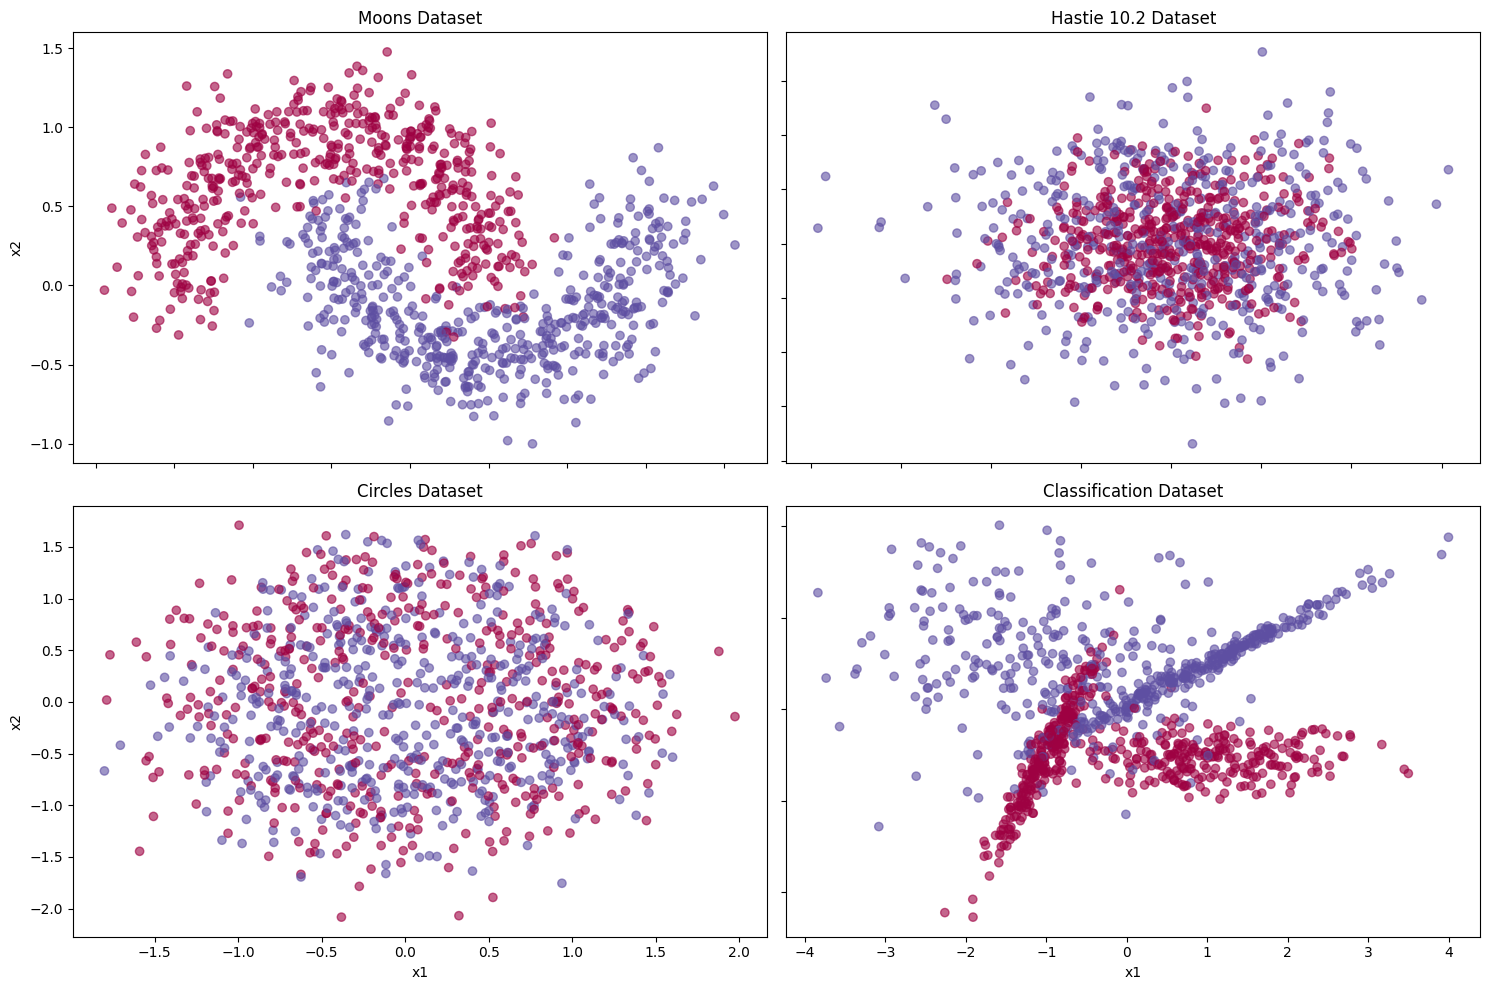

In [3]:
# Plot The dataset
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

scatter_args = {'cmap': plt.cm.Spectral, 'alpha': 0.6}
axs[0, 0].scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, **scatter_args)
axs[0, 0].set_title('Moons Dataset')

axs[0, 1].scatter(X_hastie[:, 0], X_hastie[:, 1], c=y_hastie, **scatter_args)
axs[0, 1].set_title('Hastie 10.2 Dataset')

axs[1, 0].scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, **scatter_args)
axs[1, 0].set_title('Circles Dataset')

axs[1, 1].scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, **scatter_args)
axs[1, 1].set_title('Classification Dataset')

for ax in axs.flat:
    ax.set(xlabel='x1', ylabel='x2')
    ax.label_outer()

plt.tight_layout()
plt.show()


In [4]:
# transform into one-hot encoder
from sklearn.preprocessing import OneHotEncoder

one_hot_encode = OneHotEncoder(sparse=False)
y_onehot_moon = one_hot_encode.fit_transform(y_moon.reshape(-1,1))
y_onehot_hastie = one_hot_encode.fit_transform(y_hastie.reshape(-1,1))
y_onehot_circle = one_hot_encode.fit_transform(y_circle.reshape(-1,1))
y_onehot_multi = one_hot_encode.fit_transform(y_multi.reshape(-1,1))

c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

In [5]:
# Split dataset into training and testing dataset
from sklearn.model_selection import train_test_split

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_onehot_moon, test_size=0.2, random_state=42)
X_train_hastie, X_test_hastie, y_train_hastie, y_test_hastie = train_test_split(X_hastie, y_onehot_hastie, test_size=0.2, random_state=42)
X_train_circle, X_test_circle, y_train_circle, y_test_circle = train_test_split(X_circle, y_onehot_circle, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_onehot_multi, test_size=0.2, random_state=42)


Implement MLP models using numpy

In [7]:
# define the hyperparameter configuration for MLP
dnn_hidden_units = '20'
learning_rate = 1e-2
max_steps = 1500
eval_freq = 10
mode = 'stochastic'
batch_size = 0


Train dataset using MLP numpy

In [8]:
# make moon dataset
losses_numpy_moon, accuracies_numpy_moon = mlp_numpy_train(X_train_moon, y_train_moon, X_test_moon, y_test_moon, dnn_hidden_units, learning_rate, max_steps, eval_freq, mode, batch_size)


using stochastic gradient descent
Step: 0, Test Loss: 1.126821107664423, Accuracy: 31.0
Step: 10, Test Loss: 0.9231006247426606, Accuracy: 50.0
Step: 20, Test Loss: 0.8231610980425899, Accuracy: 50.0
Step: 30, Test Loss: 0.6678338284175187, Accuracy: 57.99999999999999
Step: 40, Test Loss: 0.5960051574207936, Accuracy: 60.0
Step: 50, Test Loss: 0.5482574195281618, Accuracy: 57.49999999999999
Step: 60, Test Loss: 0.5342416943689787, Accuracy: 56.49999999999999
Step: 70, Test Loss: 0.4947530590236664, Accuracy: 72.5
Step: 80, Test Loss: 0.4580978526543989, Accuracy: 83.0
Step: 90, Test Loss: 0.43545456853332737, Accuracy: 83.0
Step: 100, Test Loss: 0.3993125493941382, Accuracy: 83.5
Step: 110, Test Loss: 0.4089241536693017, Accuracy: 82.0
Step: 120, Test Loss: 0.38391448055768196, Accuracy: 83.0
Step: 130, Test Loss: 0.35266692826669055, Accuracy: 84.5
Step: 140, Test Loss: 0.34364771794816934, Accuracy: 84.0
Step: 150, Test Loss: 0.34093575603059745, Accuracy: 84.5
Step: 160, Test Loss: 

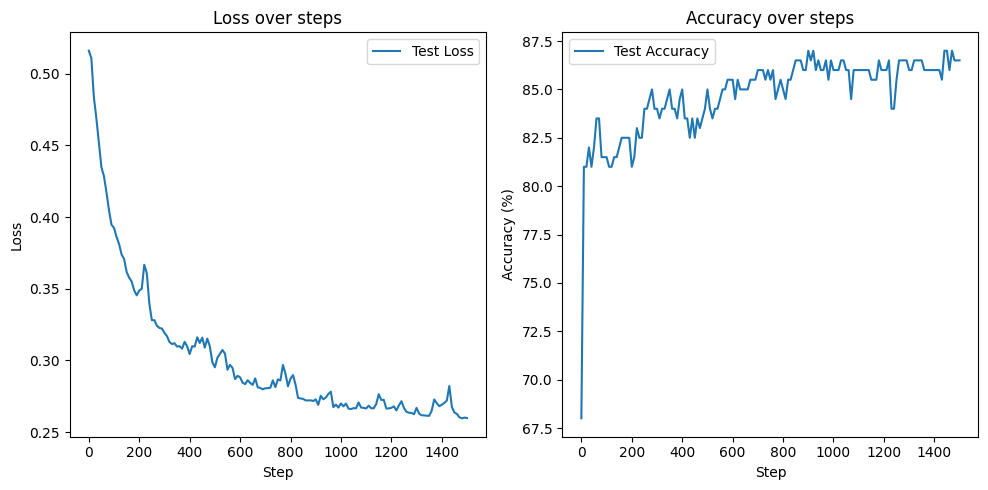

In [8]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Generate a range that matches the length of the losses array
steps = range(0, len(losses_numpy_moon) * eval_freq, eval_freq)
plt.plot(steps, losses_numpy_moon, label='Test Loss')
plt.title('Loss over steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
# Use the same steps range as for losses
plt.plot(steps, accuracies_numpy_moon, label='Test Accuracy')
plt.title('Accuracy over steps')
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [60]:
# hastie dataset
losses_numpy_hastie, accuracies_numpy_hastie = mlp_numpy_train(X_train_hastie, y_train_hastie, X_test_hastie, y_test_hastie, dnn_hidden_units, learning_rate, max_steps, eval_freq, mode, batch_size)


using stochastic gradient descent
Step: 0, Test Loss: 0.8866179249675897, Accuracy: 53.5
Step: 10, Test Loss: 0.8545380823016697, Accuracy: 49.5
Step: 20, Test Loss: 0.8323507040894068, Accuracy: 50.5
Step: 30, Test Loss: 0.8279385234432229, Accuracy: 49.0
Step: 40, Test Loss: 0.8260130652925531, Accuracy: 51.5
Step: 50, Test Loss: 0.8151723098674643, Accuracy: 49.5
Step: 60, Test Loss: 0.8030728704792071, Accuracy: 49.5
Step: 70, Test Loss: 0.7888047376618702, Accuracy: 52.0
Step: 80, Test Loss: 0.7748043997292621, Accuracy: 52.0
Step: 90, Test Loss: 0.772843638957394, Accuracy: 53.0
Step: 100, Test Loss: 0.7675042512142752, Accuracy: 50.0
Step: 110, Test Loss: 0.8257163182061266, Accuracy: 54.50000000000001
Step: 120, Test Loss: 0.7870085541222437, Accuracy: 50.5
Step: 130, Test Loss: 0.766822456920645, Accuracy: 51.5
Step: 140, Test Loss: 0.7327790832164848, Accuracy: 51.5
Step: 150, Test Loss: 0.714766002981226, Accuracy: 50.0
Step: 160, Test Loss: 0.7027793059369613, Accuracy: 51.

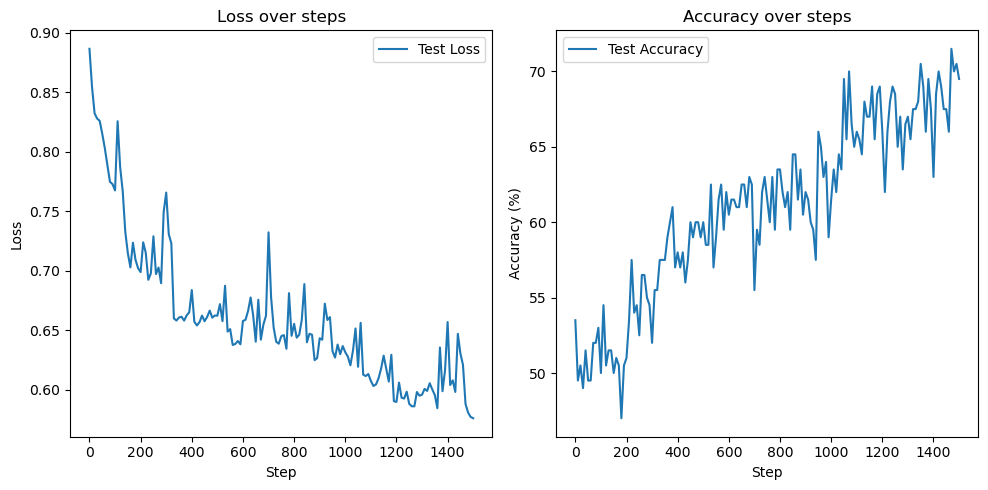

In [61]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Generate a range that matches the length of the losses array
steps = range(0, len(losses_numpy_hastie) * eval_freq, eval_freq)
plt.plot(steps, losses_numpy_hastie, label='Test Loss')
plt.title('Loss over steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
# Use the same steps range as for losses
plt.plot(steps, accuracies_numpy_hastie, label='Test Accuracy')
plt.title('Accuracy over steps')
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
# circle dataset
losses_numpy_circle, accuracies_numpy_circle = mlp_numpy_train(X_train_circle, y_train_circle, X_test_circle, y_test_circle, dnn_hidden_units, learning_rate, max_steps, eval_freq, mode, batch_size)


using stochastic gradient descent
Step: 0, Test Loss: 0.7615362821775651, Accuracy: 47.0
Step: 10, Test Loss: 0.7655902806946682, Accuracy: 47.5
Step: 20, Test Loss: 0.7557171585261178, Accuracy: 46.0
Step: 30, Test Loss: 0.7769630419040934, Accuracy: 48.5
Step: 40, Test Loss: 0.7691255370196367, Accuracy: 50.0
Step: 50, Test Loss: 0.7530636464137831, Accuracy: 49.5
Step: 60, Test Loss: 0.7430449691755223, Accuracy: 52.0
Step: 70, Test Loss: 0.7369311973155125, Accuracy: 50.5
Step: 80, Test Loss: 0.7485348497153861, Accuracy: 48.5
Step: 90, Test Loss: 0.7547520731052749, Accuracy: 49.5
Step: 100, Test Loss: 0.7428248012865055, Accuracy: 52.5
Step: 110, Test Loss: 0.712910849296149, Accuracy: 51.0
Step: 120, Test Loss: 0.7189930194055595, Accuracy: 51.0
Step: 130, Test Loss: 0.7043970434588416, Accuracy: 54.0
Step: 140, Test Loss: 0.7010399813703485, Accuracy: 53.0
Step: 150, Test Loss: 0.714842579569023, Accuracy: 48.5
Step: 160, Test Loss: 0.6928709846316289, Accuracy: 53.0
Step: 170,

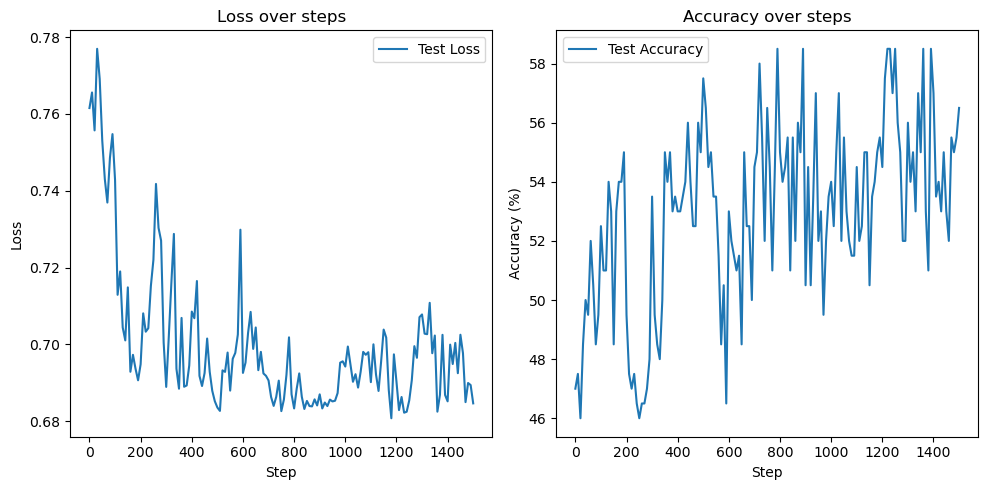

In [36]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Generate a range that matches the length of the losses array
steps = range(0, len(losses_numpy_circle) * eval_freq, eval_freq)
plt.plot(steps, losses_numpy_circle, label='Test Loss')
plt.title('Loss over steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
# Use the same steps range as for losses
plt.plot(steps, accuracies_numpy_circle, label='Test Accuracy')
plt.title('Accuracy over steps')
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
# multi dataset
losses_numpy_multi, accuracies_numpy_multi = mlp_numpy_train(X_train_multi, y_train_multi, X_test_multi, y_test_multi, dnn_hidden_units, learning_rate, max_steps, eval_freq, mode, batch_size)


using stochastic gradient descent
Step: 0, Test Loss: 0.9784108350251094, Accuracy: 60.0
Step: 10, Test Loss: 0.5520693019435886, Accuracy: 81.5
Step: 20, Test Loss: 0.46213400832635104, Accuracy: 85.5
Step: 30, Test Loss: 0.4197187964181566, Accuracy: 87.0
Step: 40, Test Loss: 0.41192993727391153, Accuracy: 86.0
Step: 50, Test Loss: 0.38616592003725264, Accuracy: 87.0
Step: 60, Test Loss: 0.3736435925674217, Accuracy: 87.0
Step: 70, Test Loss: 0.361734367568947, Accuracy: 87.0
Step: 80, Test Loss: 0.3548939693732458, Accuracy: 87.5
Step: 90, Test Loss: 0.355688256829634, Accuracy: 87.0
Step: 100, Test Loss: 0.3526457140619016, Accuracy: 87.0
Step: 110, Test Loss: 0.3465485471472384, Accuracy: 87.0
Step: 120, Test Loss: 0.3392492621568604, Accuracy: 87.0
Step: 130, Test Loss: 0.3297246697140973, Accuracy: 87.5
Step: 140, Test Loss: 0.31858934487322327, Accuracy: 87.5
Step: 150, Test Loss: 0.31543847486065324, Accuracy: 87.5
Step: 160, Test Loss: 0.30863574998904253, Accuracy: 88.5
Step

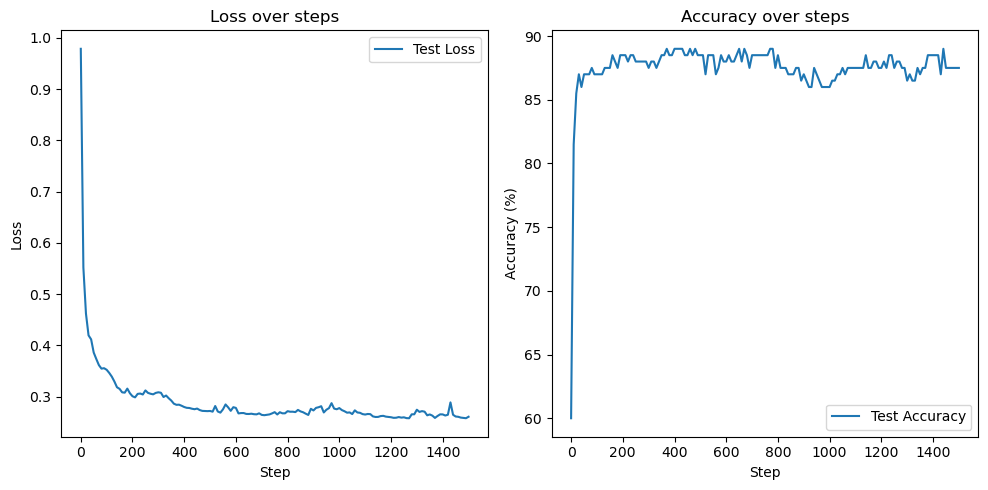

In [55]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Generate a range that matches the length of the losses array
steps = range(0, len(losses_numpy_multi) * eval_freq, eval_freq)
plt.plot(steps, losses_numpy_multi, label='Test Loss')
plt.title('Loss over steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
# Use the same steps range as for losses
plt.plot(steps, accuracies_numpy_multi, label='Test Accuracy')
plt.title('Accuracy over steps')
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


Train dataset using MLP PyTorch

In [39]:
# make moon dataset
losses_pytorch_moon, accuracies_pytorch_moon = mlp_pytorch_train(X_train_moon, y_train_moon, X_test_moon, y_test_moon, dnn_hidden_units, learning_rate, max_steps, eval_freq)


Step: 0, Test Loss: 0.8252, Accuracy: 50.00%
Step: 10, Test Loss: 0.7884, Accuracy: 50.00%
Step: 20, Test Loss: 0.7567, Accuracy: 50.00%
Step: 30, Test Loss: 0.7289, Accuracy: 50.00%
Step: 40, Test Loss: 0.7044, Accuracy: 50.00%
Step: 50, Test Loss: 0.6825, Accuracy: 50.00%
Step: 60, Test Loss: 0.6627, Accuracy: 50.50%
Step: 70, Test Loss: 0.6447, Accuracy: 60.50%
Step: 80, Test Loss: 0.6282, Accuracy: 74.00%
Step: 90, Test Loss: 0.6131, Accuracy: 78.00%
Step: 100, Test Loss: 0.5991, Accuracy: 80.50%
Step: 110, Test Loss: 0.5860, Accuracy: 80.00%
Step: 120, Test Loss: 0.5738, Accuracy: 79.50%
Step: 130, Test Loss: 0.5624, Accuracy: 79.50%
Step: 140, Test Loss: 0.5517, Accuracy: 79.50%
Step: 150, Test Loss: 0.5416, Accuracy: 79.50%
Step: 160, Test Loss: 0.5322, Accuracy: 79.50%
Step: 170, Test Loss: 0.5232, Accuracy: 79.50%
Step: 180, Test Loss: 0.5147, Accuracy: 79.50%
Step: 190, Test Loss: 0.5067, Accuracy: 79.50%
Step: 200, Test Loss: 0.4991, Accuracy: 79.50%
Step: 210, Test Loss: 0.

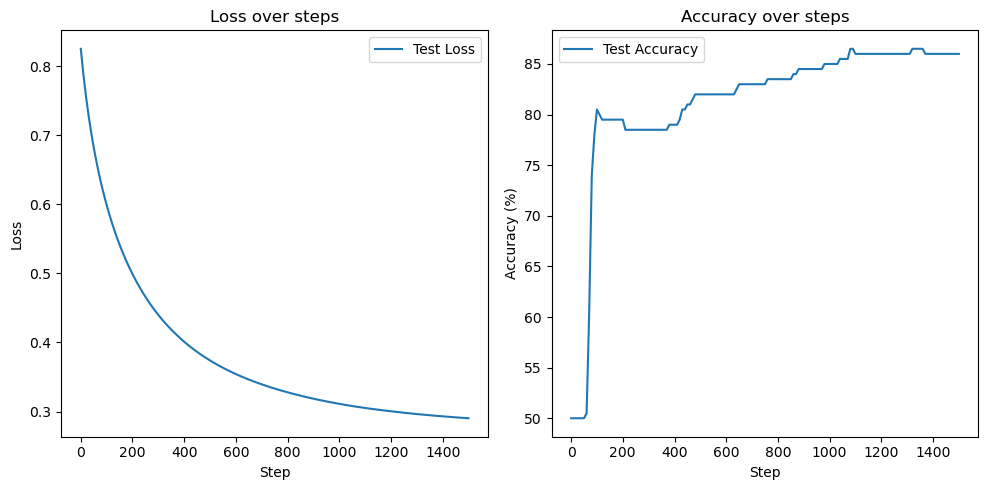

In [40]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Generate a range that matches the length of the losses array
steps = range(0, len(losses_pytorch_moon) * eval_freq, eval_freq)
plt.plot(steps, losses_pytorch_moon, label='Test Loss')
plt.title('Loss over steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
# Use the same steps range as for losses
plt.plot(steps, accuracies_pytorch_moon, label='Test Accuracy')
plt.title('Accuracy over steps')
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [50]:
# hastie dataset
losses_pytorch_hastie, accuracies_pytorch_hastie = mlp_pytorch_train(X_train_hastie, y_train_hastie, X_test_hastie, y_test_hastie, dnn_hidden_units, learning_rate, max_steps, eval_freq)


Step: 0, Test Loss: 0.7257, Accuracy: 40.50%
Step: 10, Test Loss: 0.7235, Accuracy: 41.50%
Step: 20, Test Loss: 0.7213, Accuracy: 42.00%
Step: 30, Test Loss: 0.7193, Accuracy: 42.50%
Step: 40, Test Loss: 0.7174, Accuracy: 43.50%
Step: 50, Test Loss: 0.7155, Accuracy: 43.50%
Step: 60, Test Loss: 0.7138, Accuracy: 44.50%
Step: 70, Test Loss: 0.7121, Accuracy: 45.00%
Step: 80, Test Loss: 0.7105, Accuracy: 44.50%
Step: 90, Test Loss: 0.7089, Accuracy: 46.00%
Step: 100, Test Loss: 0.7074, Accuracy: 46.00%
Step: 110, Test Loss: 0.7060, Accuracy: 46.00%
Step: 120, Test Loss: 0.7046, Accuracy: 47.50%
Step: 130, Test Loss: 0.7032, Accuracy: 48.00%
Step: 140, Test Loss: 0.7018, Accuracy: 48.00%
Step: 150, Test Loss: 0.7005, Accuracy: 48.50%
Step: 160, Test Loss: 0.6992, Accuracy: 49.50%
Step: 170, Test Loss: 0.6980, Accuracy: 50.00%
Step: 180, Test Loss: 0.6968, Accuracy: 49.50%
Step: 190, Test Loss: 0.6956, Accuracy: 50.00%
Step: 200, Test Loss: 0.6944, Accuracy: 51.00%
Step: 210, Test Loss: 0.

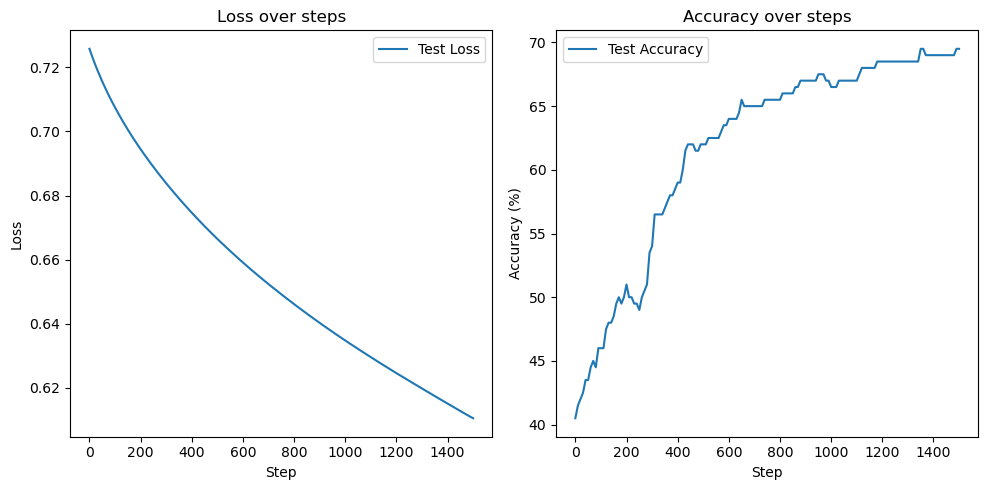

In [51]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Generate a range that matches the length of the losses array
steps = range(0, len(losses_pytorch_hastie) * eval_freq, eval_freq)
plt.plot(steps, losses_pytorch_hastie, label='Test Loss')
plt.title('Loss over steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
# Use the same steps range as for losses
plt.plot(steps, accuracies_pytorch_hastie, label='Test Accuracy')
plt.title('Accuracy over steps')
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [43]:
# circle dataset
losses_pytorch_circle, accuracies_pytorch_circle = mlp_pytorch_train(X_train_circle, y_train_circle, X_test_circle, y_test_circle, dnn_hidden_units, learning_rate, max_steps, eval_freq)


Step: 0, Test Loss: 0.6987, Accuracy: 48.50%
Step: 10, Test Loss: 0.6988, Accuracy: 50.00%
Step: 20, Test Loss: 0.6989, Accuracy: 48.50%
Step: 30, Test Loss: 0.6989, Accuracy: 47.50%
Step: 40, Test Loss: 0.6990, Accuracy: 45.50%
Step: 50, Test Loss: 0.6991, Accuracy: 45.50%
Step: 60, Test Loss: 0.6991, Accuracy: 46.00%
Step: 70, Test Loss: 0.6991, Accuracy: 45.00%
Step: 80, Test Loss: 0.6992, Accuracy: 45.00%
Step: 90, Test Loss: 0.6992, Accuracy: 45.00%
Step: 100, Test Loss: 0.6992, Accuracy: 45.00%
Step: 110, Test Loss: 0.6991, Accuracy: 45.50%
Step: 120, Test Loss: 0.6991, Accuracy: 45.50%
Step: 130, Test Loss: 0.6991, Accuracy: 45.00%
Step: 140, Test Loss: 0.6990, Accuracy: 45.00%
Step: 150, Test Loss: 0.6990, Accuracy: 45.00%
Step: 160, Test Loss: 0.6989, Accuracy: 45.00%
Step: 170, Test Loss: 0.6989, Accuracy: 45.50%
Step: 180, Test Loss: 0.6988, Accuracy: 45.50%
Step: 190, Test Loss: 0.6987, Accuracy: 44.50%
Step: 200, Test Loss: 0.6986, Accuracy: 44.50%
Step: 210, Test Loss: 0.

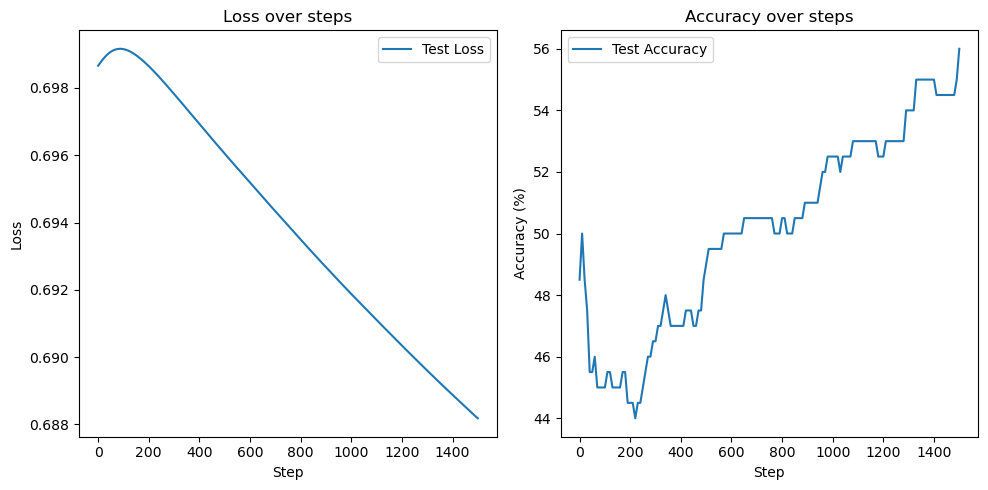

In [44]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Generate a range that matches the length of the losses array
steps = range(0, len(losses_pytorch_circle) * eval_freq, eval_freq)
plt.plot(steps, losses_pytorch_circle, label='Test Loss')
plt.title('Loss over steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
# Use the same steps range as for losses
plt.plot(steps, accuracies_pytorch_circle, label='Test Accuracy')
plt.title('Accuracy over steps')
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# multi dataset
losses_pytorch_multi, accuracies_pytorch_multi = mlp_pytorch_train(X_train_multi, y_train_multi, X_test_multi, y_test_multi, dnn_hidden_units, learning_rate, max_steps, eval_freq)


Step: 0, Test Loss: 0.6677, Accuracy: 55.00%
Step: 10, Test Loss: 0.6194, Accuracy: 61.00%
Step: 20, Test Loss: 0.5805, Accuracy: 83.00%
Step: 30, Test Loss: 0.5487, Accuracy: 85.50%
Step: 40, Test Loss: 0.5222, Accuracy: 86.50%
Step: 50, Test Loss: 0.4997, Accuracy: 87.00%
Step: 60, Test Loss: 0.4804, Accuracy: 88.50%
Step: 70, Test Loss: 0.4636, Accuracy: 88.50%
Step: 80, Test Loss: 0.4488, Accuracy: 88.50%
Step: 90, Test Loss: 0.4357, Accuracy: 88.50%
Step: 100, Test Loss: 0.4240, Accuracy: 88.50%
Step: 110, Test Loss: 0.4134, Accuracy: 88.50%
Step: 120, Test Loss: 0.4039, Accuracy: 88.50%
Step: 130, Test Loss: 0.3952, Accuracy: 88.50%
Step: 140, Test Loss: 0.3873, Accuracy: 88.50%
Step: 150, Test Loss: 0.3801, Accuracy: 89.00%
Step: 160, Test Loss: 0.3735, Accuracy: 89.00%
Step: 170, Test Loss: 0.3674, Accuracy: 88.50%
Step: 180, Test Loss: 0.3618, Accuracy: 88.50%
Step: 190, Test Loss: 0.3566, Accuracy: 88.50%
Step: 200, Test Loss: 0.3518, Accuracy: 88.50%
Step: 210, Test Loss: 0.

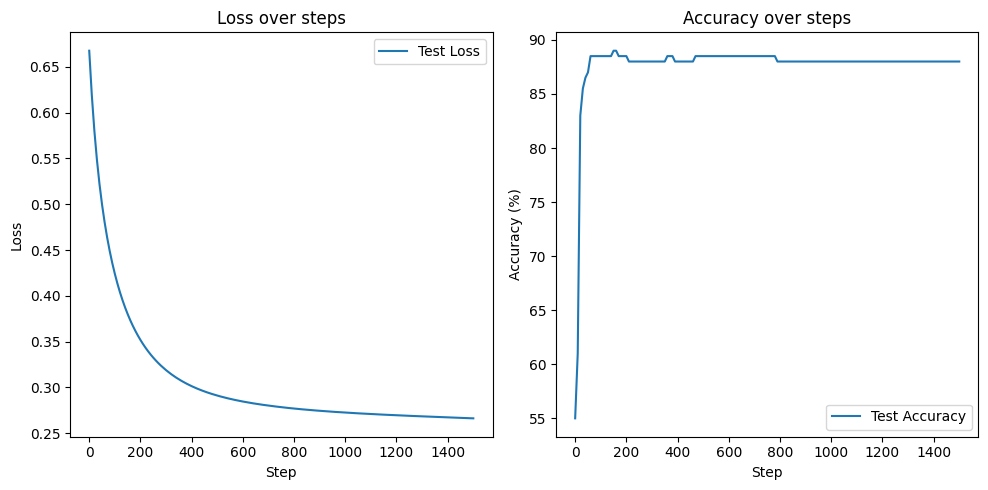

In [10]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Generate a range that matches the length of the losses array
steps = range(0, len(losses_pytorch_multi) * eval_freq, eval_freq)
plt.plot(steps, losses_pytorch_multi, label='Test Loss')
plt.title('Loss over steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
# Use the same steps range as for losses
plt.plot(steps, accuracies_pytorch_multi, label='Test Accuracy')
plt.title('Accuracy over steps')
plt.xlabel('Step')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()
